## Import necessary libraries

In [11]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims
import math
from tensorflow.keras.applications.vgg16 import preprocess_input  

## Load the model

In [12]:
# Load the custom pre-trained model
model = load_model('C:/Users/admin/Desktop/Python Prog/Age gender detector/Age_Sex Detection.keras')

# Summary of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 2,050,760 (7.82 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,367,174 (5.22 MB)

## Visualizing Activation Maps of Convolutional Layers

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 128)
conv2d_3 (3, 3, 128, 256)


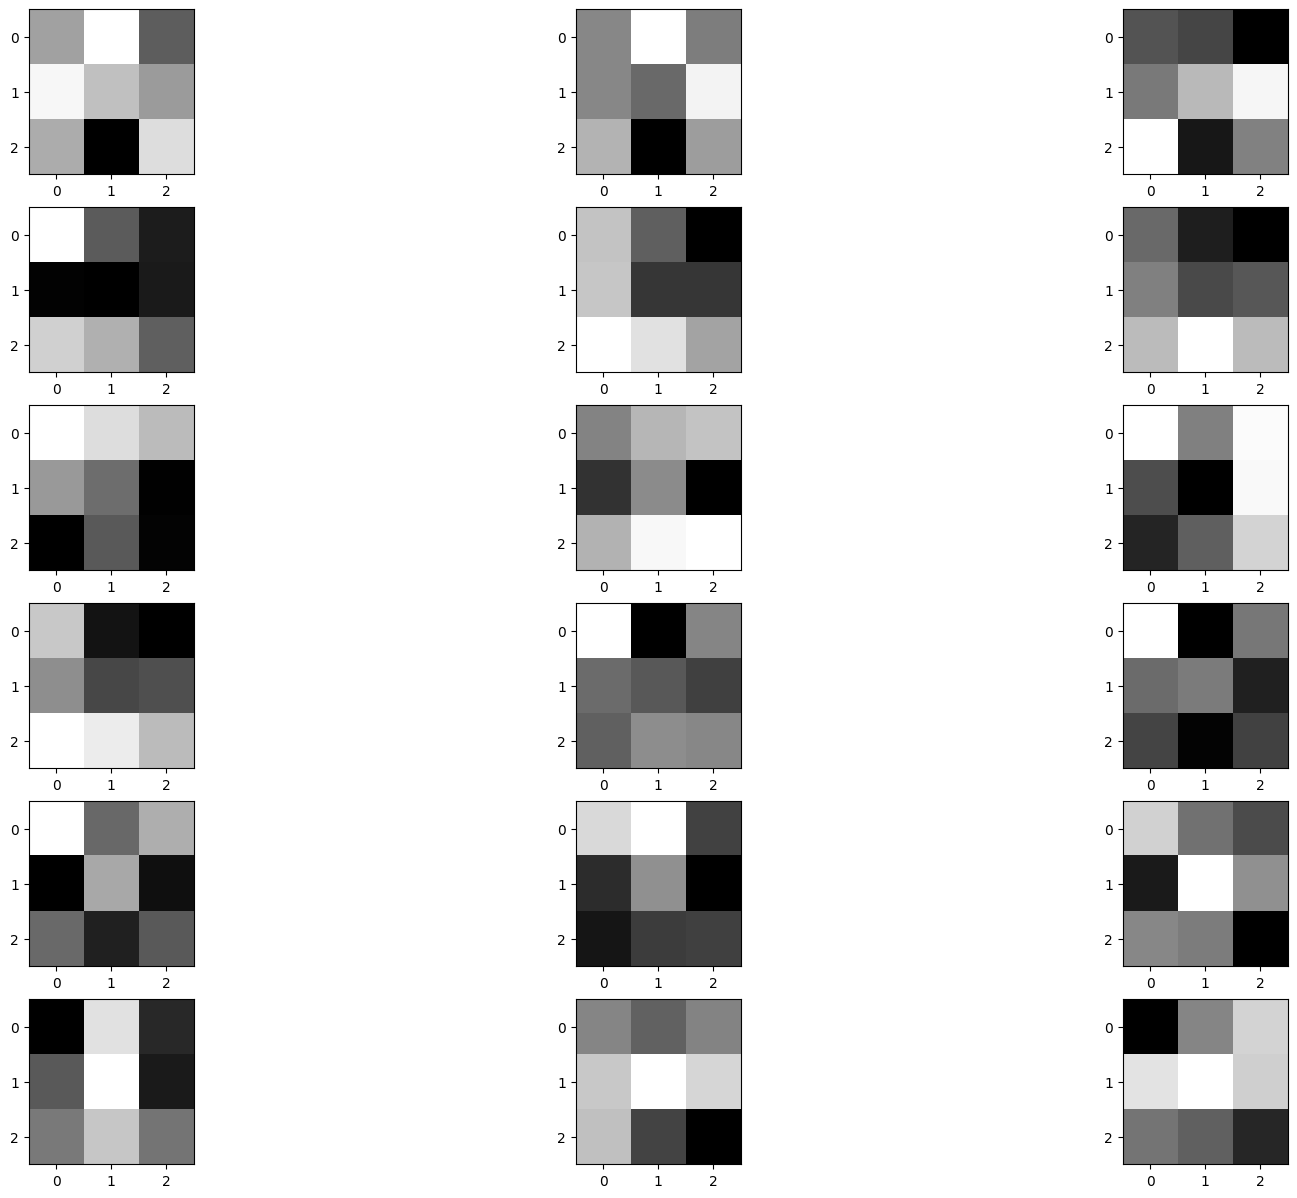

In [13]:
# Extract and normalize filters for visualization
for layer in model.layers:
    if 'conv' not in layer.name:
        continue   
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)
filters, bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters = 6
ix = 1
fig = plt.figure(figsize=(20, 15))
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

plt.show()

## Print layer details for convolutional layers

In [14]:

for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue   
    print(i, layer.name, layer.output.shape)

1 conv2d (None, 48, 48, 32)
5 conv2d_1 (None, 24, 24, 64)
9 conv2d_2 (None, 12, 12, 128)
13 conv2d_3 (None, 6, 6, 256)


## Visualize feature maps for the first convolutional layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


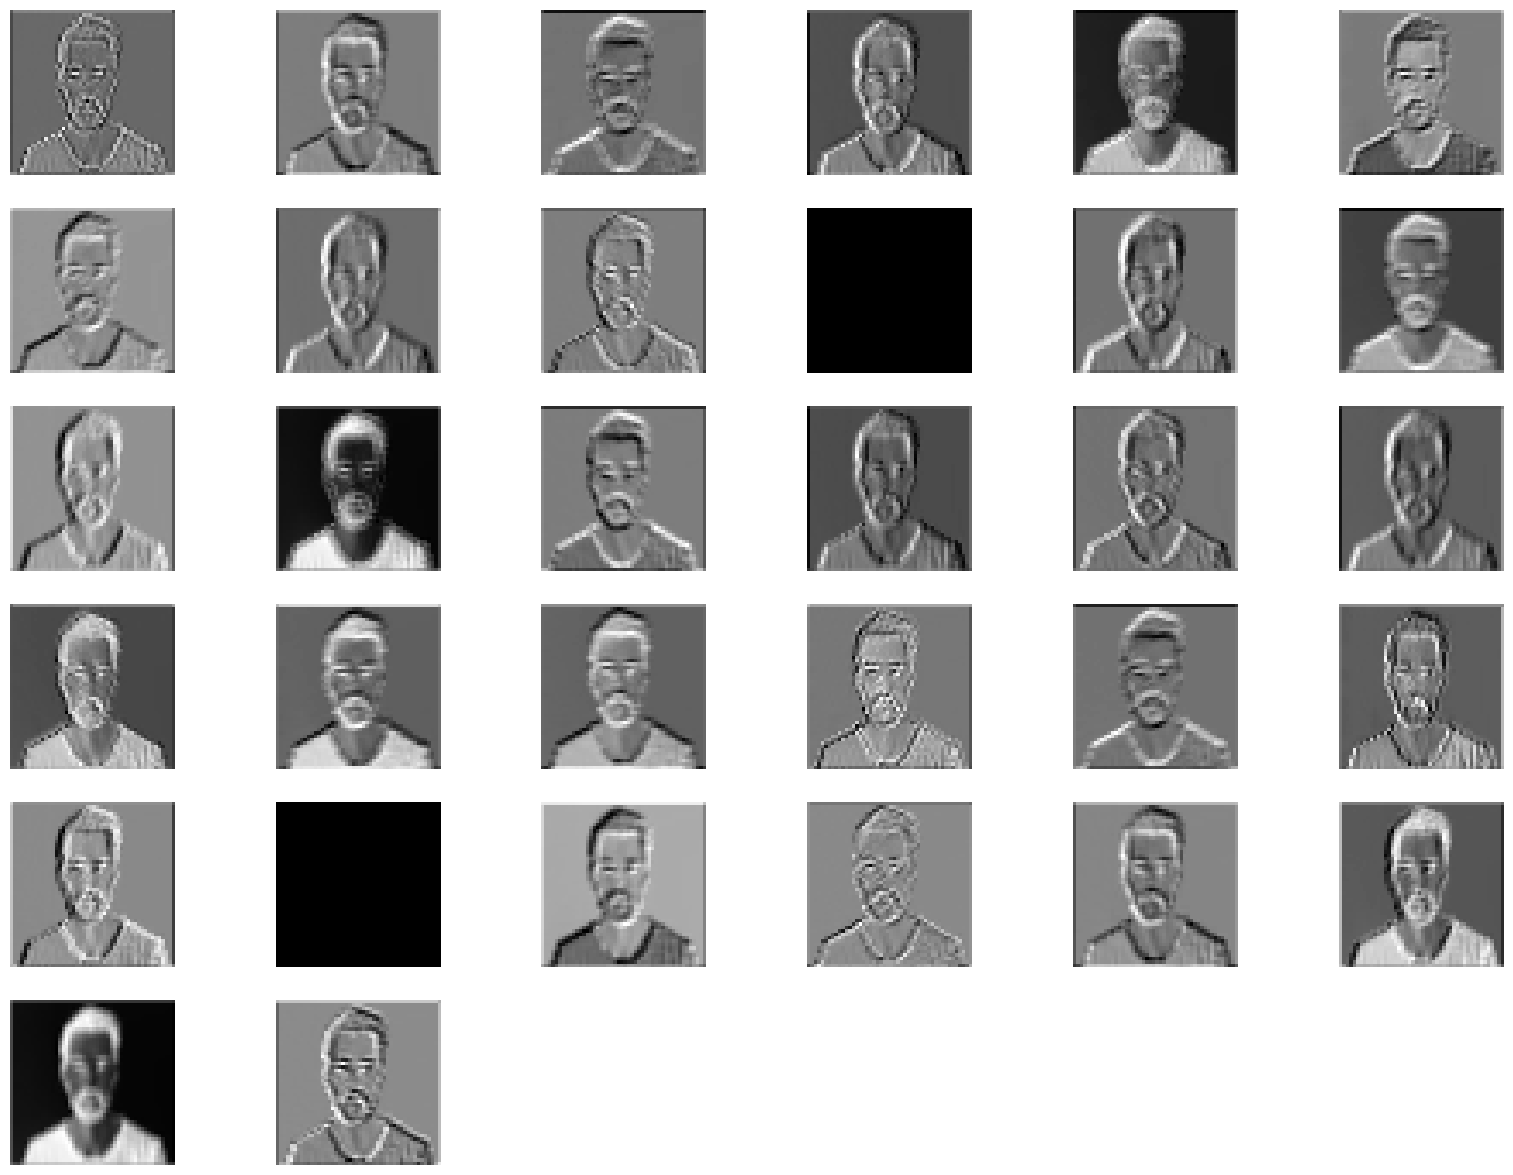

In [15]:

model = Model(inputs=model.inputs, outputs=model.layers[1].output)
image_path = "C:/Users/admin/Desktop/Python Prog/Age gender detector/Image_1.jpg"
image = load_img(image_path, target_size=(48, 48))  # Resize image to 48x48
image = img_to_array(image)
image = expand_dims(image, axis=0)
image = preprocess_input(image)  
features = model.predict(image)
num_features = features.shape[3]
grid_size = math.ceil(math.sqrt(num_features))
fig = plt.figure(figsize=(20, 15))
for i in range(1, num_features + 1):
    plt.subplot(grid_size, grid_size, i)
    plt.imshow(features[0, :, :, i - 1], cmap='gray')
    plt.axis('off')

plt.show()


## Visualize feature maps for multiple blocks

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


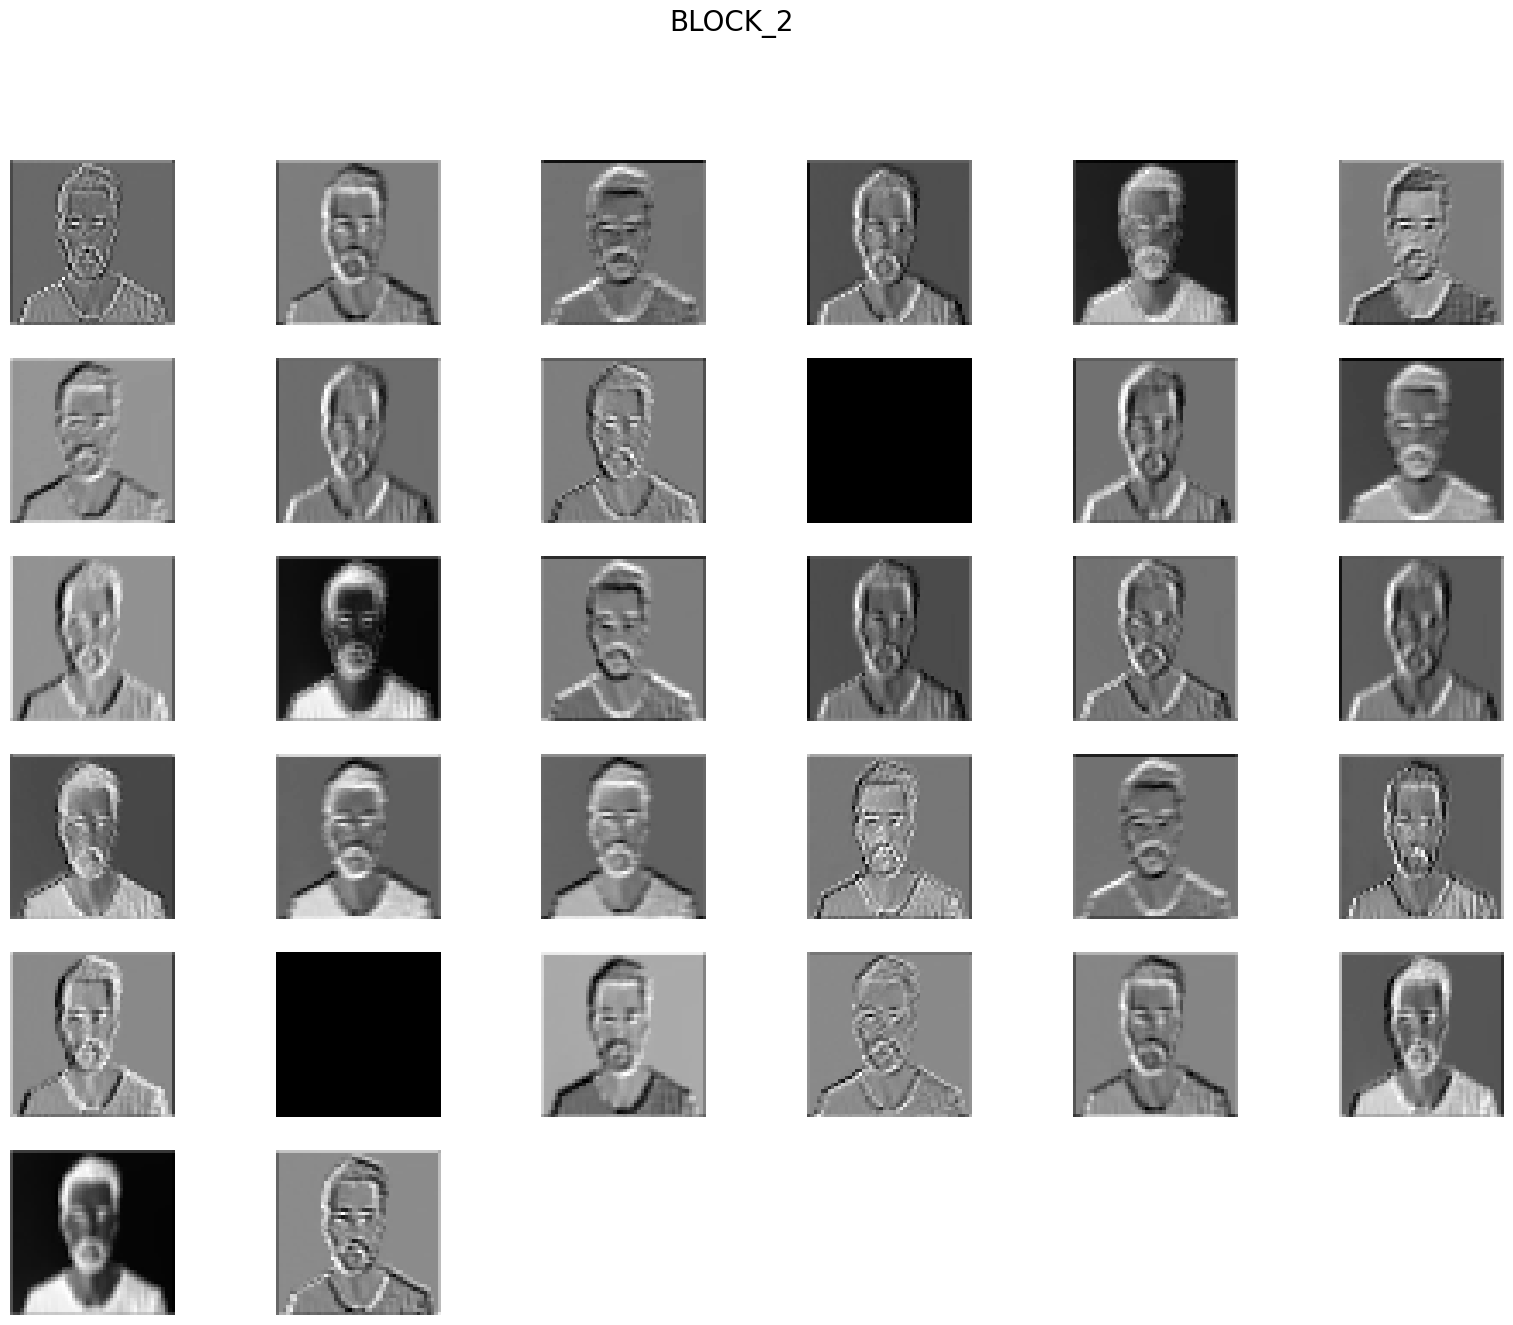

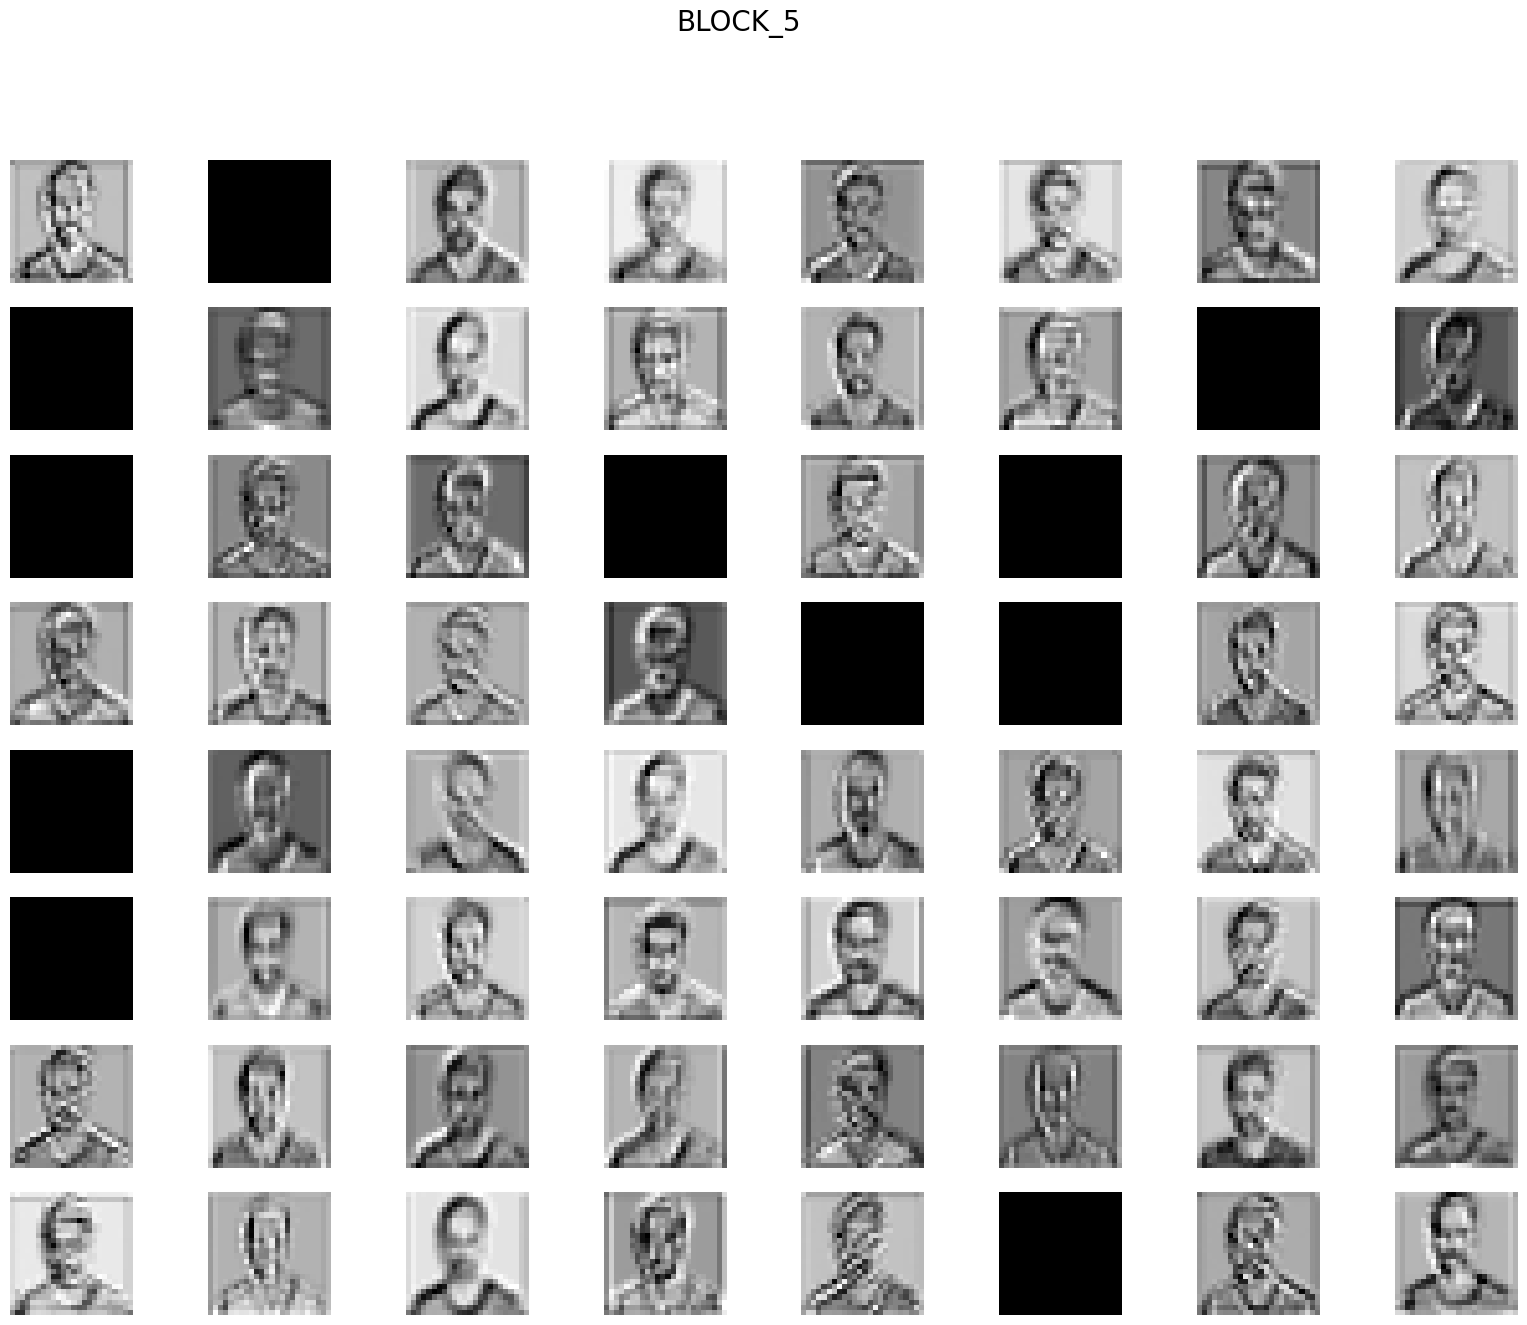

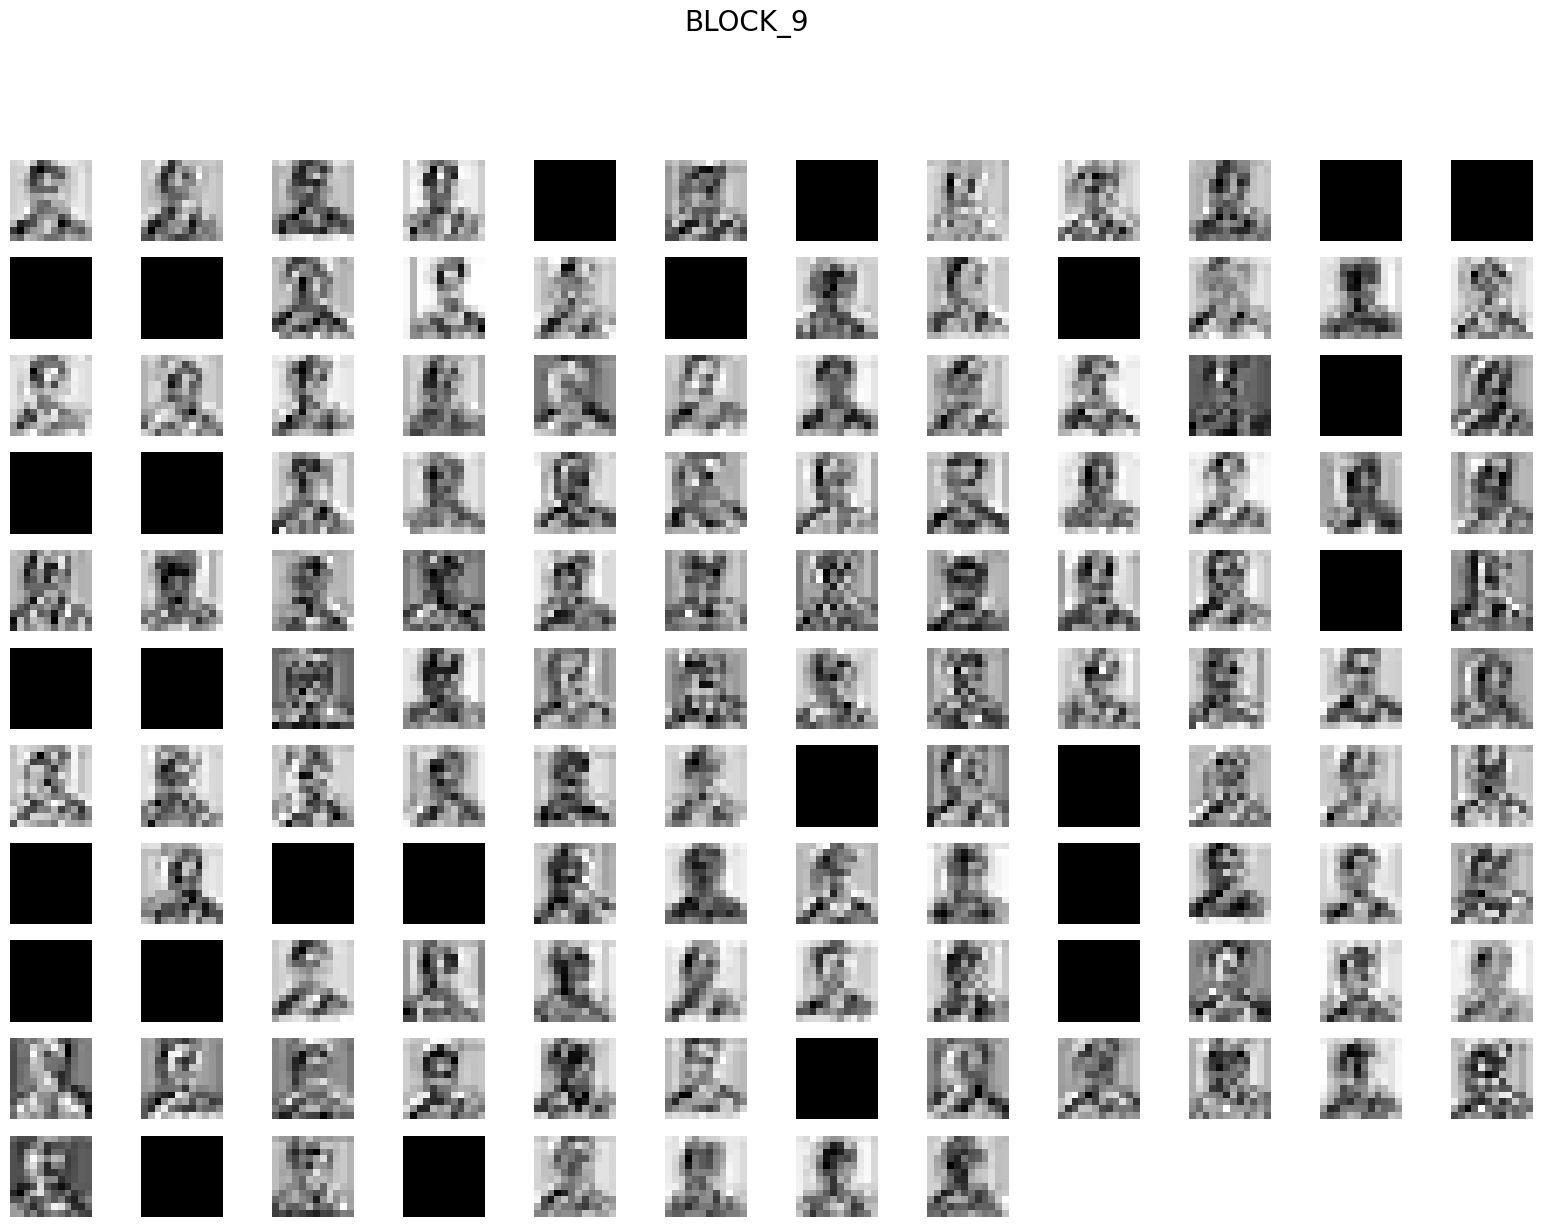

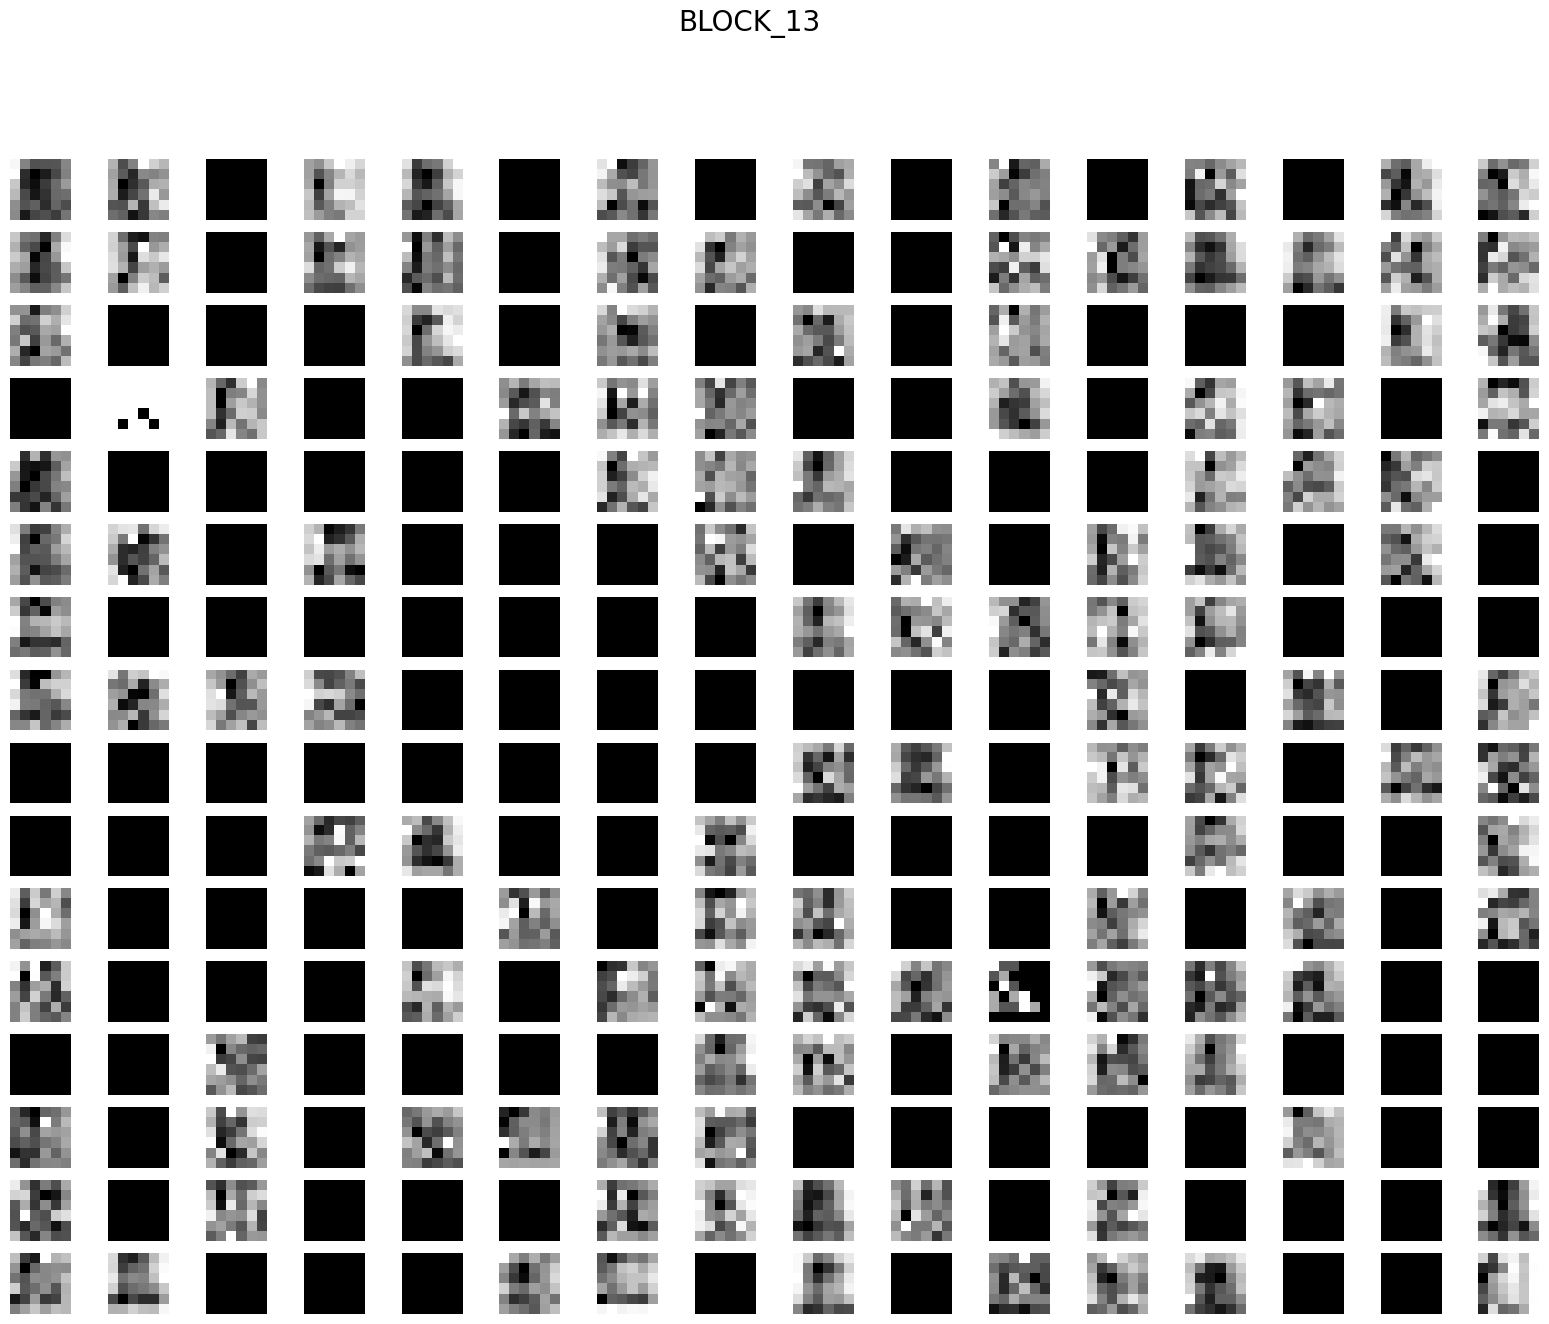

In [18]:

model2 = load_model('C:/Users/admin/Desktop/Python Prog/Age gender detector/Age_Sex Detection.keras')
blocks = [2, 5, 9, 13]
outputs = [model2.layers[i].output for i in blocks]
model2 = Model(inputs=model2.inputs, outputs=outputs)
feature_map = model2.predict(image)

for block_index, fmap in zip(blocks, feature_map):
    num_features = fmap.shape[3]
    grid_size = math.ceil(math.sqrt(num_features))
    
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(f"BLOCK_{block_index}", fontsize=20)
    for i in range(1, num_features + 1):
        plt.subplot(grid_size, grid_size, i)
        plt.imshow(fmap[0, :, :, i - 1], cmap='gray')
        plt.axis('off')
    
    plt.show()
